<a href="https://colab.research.google.com/github/godud2604/AI-bootcamp/blob/main/imagePreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
pip install pydicom

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dicom
import pprint

In [39]:
def readDICOMfile(dicom_file_path):
    ds= dicom.dcmread(dicom_file_path)

    print(f"Modality..........: {ds.Modality}")
    print(f"Image size........: {ds.Rows} x {ds.Columns}")

    image = ds.pixel_array.copy()
    # 아래 전처리를 해주지 않는다면, 데이터를 구분해서 보기 어렵다. => 잡음 많이 발생
    # image[ image <= -1999] = 0 # ct영상은 촬영을 하면 보통 -1000 ~ -2000 또는  => 양수 or 음수로 나온다.
    image[ image <= -1000] = 0 # ct영상은 촬영을 하면 보통 -1000 ~ -2000 또는  => 양수 or 음수로 나온다.

    # 2D array로 표현되는 이미지
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)

    # imshow : vmin=0, vmax=255 있고 없음의 차이 알아보기
    plt.imshow(image, cmap=plt.cm.gray) # => 화면의 디스플레이 조정
    plt.title("Image")
    plt.grid(False)

    plt.subplot(1, 2, 2)
    plt.hist(ds.pixel_array  )
    plt.title("Histogram")
    plt.grid(True)
    plt.show()

    return ds


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
IMG_DIR = '/content/drive/MyDrive/biodata/img_data/'

In [42]:
img_list = ['00ac73cfc372.dcm' , 'MRI-Image-104.dcm' ,
            'ID_0000_AGE_0060_CONTRAST_1_CT.dcm',
            'ID_0052_AGE_0072_CONTRAST_0_CT.dcm',
            'dicom_00000001_000.dcm',
            'ID_0011fe81e.dcm', 'test.dcm'
           ]

In [43]:
idx = 6
dicom_file_dataset= readDICOMfile(IMG_DIR + img_list[ idx ] )
pprint.pprint(dicom_file_dataset)


Modality..........: CR
Image size........: 1024 x 1024


KeyboardInterrupt: ignored

# 이미지 전처리

In [44]:
import cv2

영상1의 shape: (1024, 1024)
영상2의 shape: (512, 512, 3)


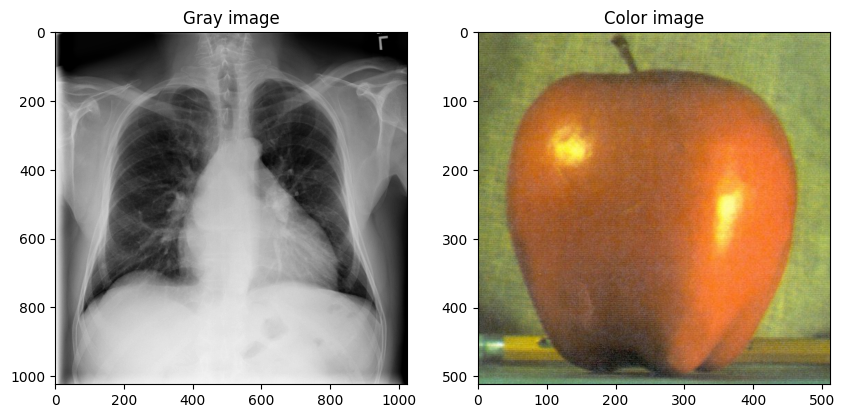

In [46]:
image1 = cv2.imread(IMG_DIR+'chest_01.png',cv2.IMREAD_GRAYSCALE)
print('영상1의 shape:', image1.shape)

image2 = cv2.imread(IMG_DIR+'apple.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB )
print('영상2의 shape:', image2.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Gray image")
plt.imshow(image1, cmap='gray' )

plt.subplot(1, 2, 2)
plt.title("Color image")
plt.imshow(image2)
plt.show()


(512, 512, 3) <class 'numpy.ndarray'>


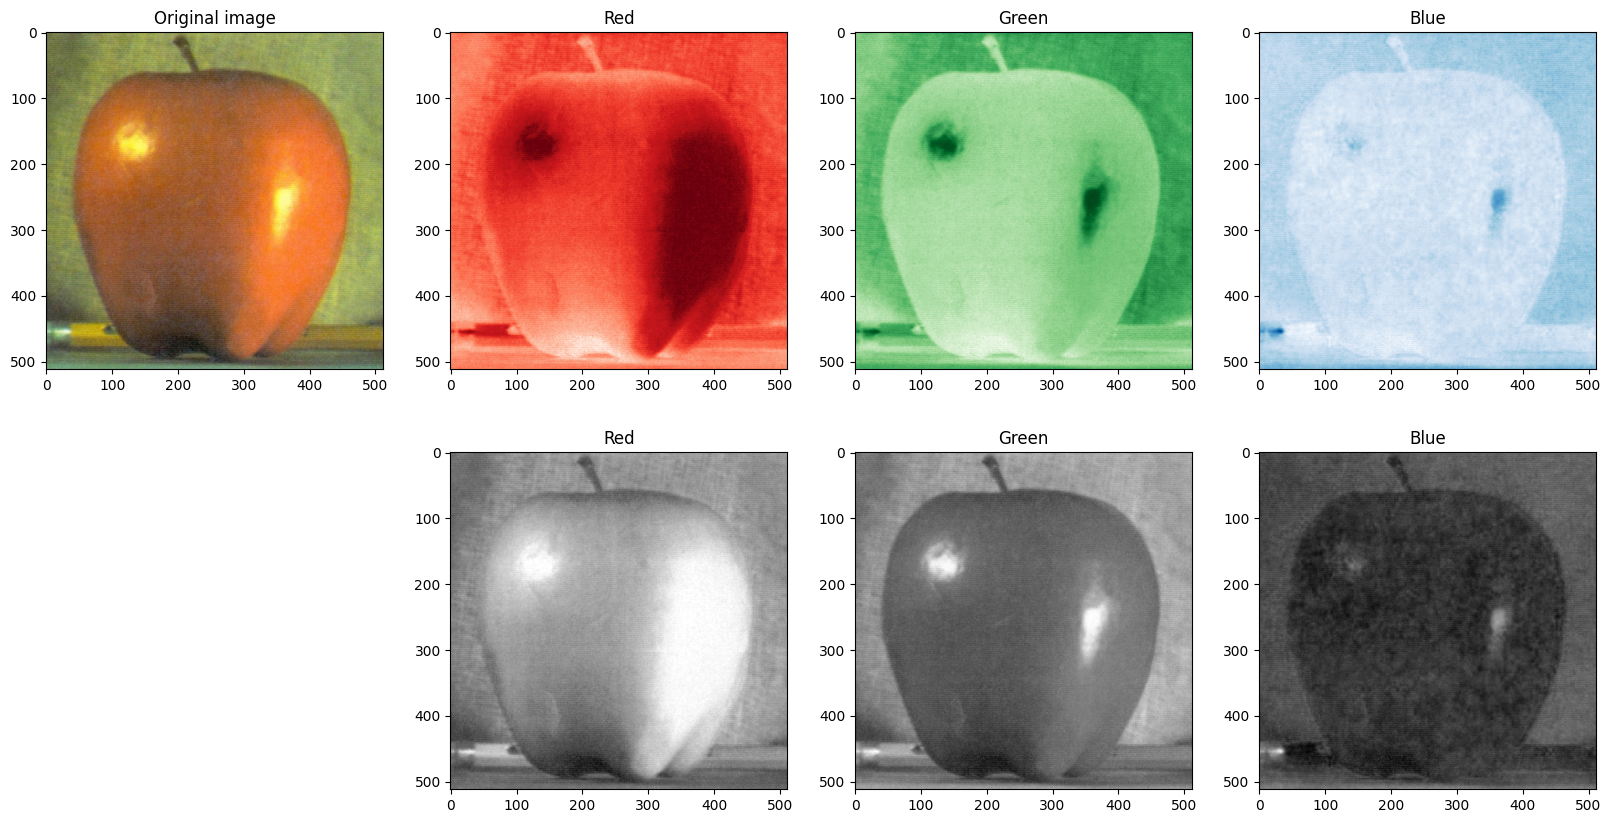

In [48]:
image2 = cv2.imread(IMG_DIR+'apple.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
print(image2.shape, type(image2))

plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
plt.title("Original image")
plt.imshow(image2)
plt.subplot(2, 4, 2)
plt.title("Red")
plt.imshow(image2[ :, :, 0 ], cmap='Reds', vmin=0, vmax=255)
plt.subplot(2, 4, 3)
plt.title("Green")
plt.imshow(image2[ :, :, 1  ], cmap='Greens', vmin=0, vmax=255)
plt.subplot(2, 4, 4)
plt.title("Blue")
plt.imshow(image2[ :, :, 2  ], cmap='Blues', vmin=0, vmax=255)
plt.subplot(2, 4, 5).set_visible(False)
plt.subplot(2, 4, 6)
plt.title("Red")
plt.imshow(image2[ :, :, 0 ], cmap='gray', vmin=0, vmax=255)
plt.subplot(2, 4, 7)
plt.title("Green")
plt.imshow(image2[ :, :, 1 ], cmap='gray', vmin=0, vmax=255)
plt.subplot(2, 4, 8)
plt.title("Blue")
plt.imshow(image2[ :, :, 2 ], cmap='gray', vmin=0, vmax=255)
plt.show()
